In [1]:
#安装UCI数据库包
!pip install ucimlrepo

In [101]:
from plotnine import *
import matplotlib.pyplot as plt
import matplotlib
from plotnine.data import *
import numpy as np
import seaborn as sns
from scipy.stats import boxcox
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
import pandas as pd

In [177]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
statlog_australian_credit_approval = fetch_ucirepo(id=143) 
  
# data (as pandas dataframes) 
X = statlog_australian_credit_approval.data.features 
y = statlog_australian_credit_approval.data.targets 
  
# metadata 
print(statlog_australian_credit_approval.metadata) 
  
# variable information 
print(statlog_australian_credit_approval.variables) 


{'uci_id': 143, 'name': 'Statlog (Australian Credit Approval)', 'repository_url': 'https://archive.ics.uci.edu/dataset/143/statlog+australian+credit+approval', 'data_url': 'https://archive.ics.uci.edu/static/public/143/data.csv', 'abstract': 'This file concerns credit card applications. This database exists elsewhere in the repository (Credit Screening Database) in a slightly different form', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 690, 'num_features': 14, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': [], 'target_col': ['A15'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1987, 'last_updated': None, 'dataset_doi': '10.24432/C59012', 'creators': ['Ross Quinlan'], 'intro_paper': None, 'additional_info': {'summary': 'This file concerns credit card applications.  All attribute names and values have been changed to meaningless symbols to protect 

In [178]:
X['A15']=y
X

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
0,1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
2,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
3,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
4,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1,31.57,10.500,2,14,4,6.500,1,0,0,0,2,0,1,1
686,1,20.67,0.415,2,8,4,0.125,0,0,0,0,2,0,45,0
687,0,18.83,9.540,2,6,4,0.085,1,0,0,0,2,100,1,1
688,0,27.42,14.500,2,14,8,3.085,1,1,1,0,2,120,12,1


In [78]:
col1 = [1,2,6,9,12,13]
X.iloc[:,col1].describe()

,A2,A3,A7,A10,A13,A14
count,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000
mean,31.568203,4.758725,2.223406,2.40000,184.014493,1018.385507
std,11.853273,4.978163,3.346513,4.86294,172.159274,5210.102598
min,13.750000,0.000000,0.000000,0.00000,0.000000,1.000000
25%,22.670000,1.000000,0.165000,0.00000,80.000000,1.000000
50%,28.625000,2.750000,1.000000,0.00000,160.000000,6.000000
75%,37.707500,7.207500,2.625000,3.00000,272.000000,396.500000
max,80.250000,28.000000,28.500000,67.00000,2000.000000,100001.000000


In [5]:
X.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
0,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [6]:
#检查数据还是否存在缺失值
print(X.isnull().any().any())

False


In [7]:
#将数据型数据单独出来，做一定的可视化与预处理
col1 = [1,2,6,9,12,13]
X.iloc[:,col1].head()
#X_con.head()

,A2,A3,A7,A10,A14
0,22.08,11.46,1.585,0,1213
1,22.67,7.00,0.165,0,1
2,29.58,1.75,1.250,0,1
3,21.67,11.50,0.000,11,1
4,20.17,8.17,1.960,14,159


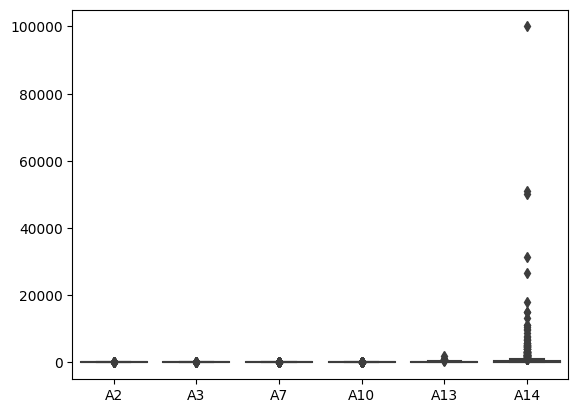

In [79]:
#做箱线图检测数值型数据的异常值
sns.boxplot(data=X.iloc[:,col1],whis=1.5)
#plt.ylim(-100, 20000)
plt.show()

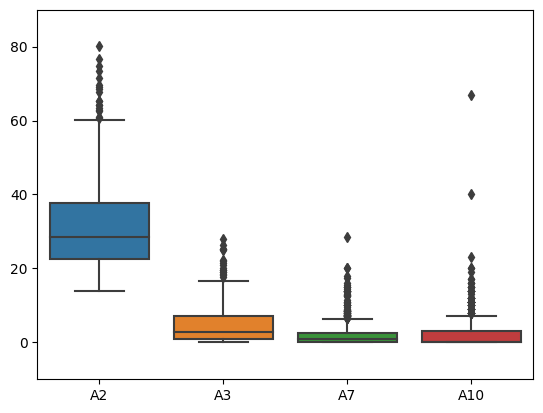

In [15]:
col2 = [1,2,6,9]
sns.boxplot(data=X.iloc[:,col2],whis=1.5)
plt.ylim(-10, 90)
plt.show()

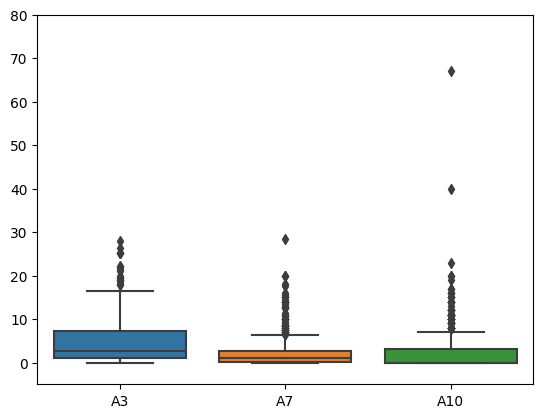

In [34]:
col3 = [2,6,9]
sns.boxplot(data=X.iloc[:,col3],whis=1.5)
plt.ylim(-5, 80)
plt.show()

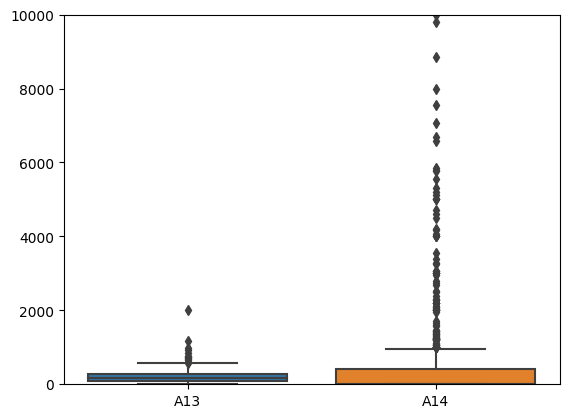

In [66]:
col3 = [12,13]
sns.boxplot(data=X.iloc[:,col3],whis=1.5)
plt.ylim(-5, 10000)
plt.show()

In [179]:
X = X[X['A14'] <= 20000]
X = X[X['A13'] <= 2000]
X = X[X['A10'] <= 30]
X = X[X['A7'] <= 25]

In [116]:
def check_isnull(X):
    try:
        if not isinstance(X, pd.DataFrame):
            raise TypeError('X is not a pandas DataFrame')

        if X.isnull().any().any():
            raise TypeError('There are still missing values')
        else:
            print('No missing values')
    except TypeError as e:
        print(e)
    finally:
        print('Check completed')

In [117]:
check_isnull(X)

No missing values
Check completed


In [180]:
def preprocess_continuous_data(X, columns_to_transform):#数值型数据BOX-COX处理
    for col in columns_to_transform:
        from scipy.stats import boxcox
        X[col] = X[col] + 1
        X[col], optimal_lambda = boxcox(X[col])
    return X

In [181]:
columns_to_transform = ['A2', 'A3', 'A7', 'A10','A13', 'A14']
X = preprocess_continuous_data(X, columns_to_transform)
X

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
0,1,1.483601,2.185259,2,4,4,0.723112,0,0,0.000000,1,2,13.800419,3.980872,0
1,0,1.487970,1.846446,2,8,4,0.145903,0,0,0.000000,0,2,17.232969,0.651110,0
2,0,1.528997,0.954193,1,4,4,0.641443,0,0,0.000000,1,2,22.296856,0.651110,0
3,0,1.480462,2.187647,1,5,3,0.000000,1,1,0.961923,1,2,0.000000,0.651110,1
4,1,1.468178,1.952693,2,6,4,0.796496,1,1,0.981461,0,2,10.759437,3.309737,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1,1.538230,2.125241,2,14,4,1.166542,1,0,0.000000,0,2,0.000000,0.651110,1
686,1,1.472419,0.340195,2,8,4,0.113699,0,0,0.000000,0,2,0.000000,2.755241,0
687,0,1.455999,2.059348,2,6,4,0.079607,1,0,0.000000,0,2,13.800419,0.651110,1
688,0,1.517855,2.345869,2,14,8,0.948718,1,1,0.509532,0,2,15.052896,2.048420,1


In [165]:
class Dataset:
    def __init__(self, X, y, test_size):
        self.X = X
        self.y = y
        self.test_size = test_size
        self.X_train, self.X_test, self.y_train, self.y_test = self._split_data()

    def _split_data(self):#
        from sklearn.model_selection import train_test_split
        return train_test_split(self.X, self.y, test_size=self.test_size,shuffle=True)
    
    def get_train_data(self):
        return self.X_train, self.y_train

    def get_test_data(self):
        return self.X_test, self.y_test

    def get_data(self):
        return self.X, self.y

In [147]:
X['A15']

0      0
1      0
2      0
3      1
4      1
      ..
685    1
686    0
687    1
688    1
689    1
Name: A15, Length: 683, dtype: int64

In [183]:
dataset = Dataset(X=X.iloc[:,:-1], y=X['A15'], test_size=0.25)
dataset.X

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14
0,1,1.483601,2.185259,2,4,4,0.723112,0,0,0.000000,1,2,13.800419,3.980872
1,0,1.487970,1.846446,2,8,4,0.145903,0,0,0.000000,0,2,17.232969,0.651110
2,0,1.528997,0.954193,1,4,4,0.641443,0,0,0.000000,1,2,22.296856,0.651110
3,0,1.480462,2.187647,1,5,3,0.000000,1,1,0.961923,1,2,0.000000,0.651110
4,1,1.468178,1.952693,2,6,4,0.796496,1,1,0.981461,0,2,10.759437,3.309737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1,1.538230,2.125241,2,14,4,1.166542,1,0,0.000000,0,2,0.000000,0.651110
686,1,1.472419,0.340195,2,8,4,0.113699,0,0,0.000000,0,2,0.000000,2.755241
687,0,1.455999,2.059348,2,6,4,0.079607,1,0,0.000000,0,2,13.800419,0.651110
688,0,1.517855,2.345869,2,14,8,0.948718,1,1,0.509532,0,2,15.052896,2.048420


In [169]:
X

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
0,1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
2,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
3,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
4,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1,31.57,10.500,2,14,4,6.500,1,0,0,0,2,0,1,1
686,1,20.67,0.415,2,8,4,0.125,0,0,0,0,2,0,45,0
687,0,18.83,9.540,2,6,4,0.085,1,0,0,0,2,100,1,1
688,0,27.42,14.500,2,14,8,3.085,1,1,1,0,2,120,12,1


In [184]:
x_train,y_train = dataset.get_train_data()
x_test,y_test = dataset.get_test_data()
x_test

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14
558,1,1.628111,2.019267,2,1,1,1.030192,0,1,0.509532,0,2,11.609526,1.730483
156,1,1.447793,0.151369,2,11,7,0.180077,0,0,0.000000,0,2,19.112689,2.709621
77,1,1.530208,1.379518,2,8,4,0.145903,0,0,0.000000,0,2,19.802382,0.651110
102,1,1.519211,2.309740,2,9,4,1.134250,1,0,0.000000,1,2,28.601063,3.718595
467,1,1.531403,0.684108,1,3,5,0.359719,1,1,0.953125,1,2,15.746483,2.534152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,1,1.561212,0.586049,2,10,4,0.038761,0,0,0.000000,0,2,15.052896,1.637987
205,1,1.534902,0.000000,2,9,4,0.641443,1,1,0.509532,0,2,19.200627,0.651110
122,0,1.565363,0.869019,2,1,1,0.000000,0,0,0.000000,0,2,12.086059,0.651110
587,0,1.563727,1.740856,2,4,4,0.566573,1,0,0.000000,1,2,0.000000,0.651110


In [187]:
#决策树预测及评价
accuracies = []
precisions = []
aucs = []
from sklearn import tree
for i in range(1,5):
    dataset = Dataset(X=X.iloc[:,:-1], y=X['A15'], test_size=0.25)
    x_train,y_train = dataset.get_train_data()
    x_test,y_test = dataset.get_test_data()
    clf = tree.DecisionTreeClassifier() #实例化模型对象
    clf.fit(x_train,y_train) #用训练集数据训练模型
    y_predict2=clf.predict(x_test)
    accuracies.append(accuracy_score(y_test, y_predict2))
    precisions.append(classification_report(y_test, y_predict2, labels=[1, 0], target_names=["+", "-"],output_dict=True)['+']['precision'])
    aucs.append(roc_auc_score(y_test,y_predict2))
average_accuracy = np.mean(accuracies)
average_precision = np.mean(precisions)
average_auc = np.mean(aucs)
print('决策树准确率：', average_accuracy)
print("‘+’类精确率：", average_precision)
print("AUC的值为",average_auc)

决策树准确率： 0.8187134502923976
‘+’类精确率： 0.787537551252385
AUC的值为 0.8105171735774147


In [242]:
def train_test(method,X):
    accuracies = []
    precisions = []
    aucs = []
    if method == 'DecisionTree':
        from sklearn import tree
        clf = tree.DecisionTreeClassifier() 
    if method == 'SVM':
        from sklearn import svm
        clf = svm.SVC(kernel="linear", decision_function_shape="ovo") 
    if method == 'RandomForest':
        from sklearn.ensemble import RandomForestClassifier
        clf = RandomForestClassifier(n_estimators=100, random_state=42) 
    for i in range(0,10):
        dataset = Dataset(X=X.iloc[:,:-1], y=X['A15'], test_size=0.25)
        x_train,y_train = dataset.get_train_data()
        x_test,y_test = dataset.get_test_data()
        clf.fit(x_train,y_train) #用训练集数据训练模型
        y_predict=clf.predict(x_test)
        accuracies.append(accuracy_score(y_test, y_predict))
        precisions.append(classification_report(y_test, y_predict, labels=[1, 0], target_names=["+", "-"],output_dict=True)['+']['precision'])
        aucs.append(roc_auc_score(y_test,y_predict))
    average_accuracy = np.mean(accuracies)
    average_precision = np.mean(precisions)
    average_auc = np.mean(aucs)
    print('{method}准确率：{accuracy}'.format(method = method, accuracy = average_accuracy))
    print("‘+’类精确率：", average_precision)
    print("AUC的值为",average_auc)

In [243]:
train_test('DecisionTree',X)

DecisionTree准确率：0.8245614035087719
‘+’类精确率： 0.7984815039108424
AUC的值为 0.8229287027859364


In [244]:
train_test('SVM',X)

SVM准确率：0.8526315789473685
‘+’类精确率： 0.7713319825429665
AUC的值为 0.8617911434099026


In [245]:
train_test('RandomForest',X)

RandomForest准确率：0.8789473684210526
‘+’类精确率： 0.8633478079756113
AUC的值为 0.875598341010577


In [250]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [100, 200, 300],        # 树的数量
    'max_depth': [10, 20, None],             # 树的最大深度
    'min_samples_split': [2, 5, 10],         # 拆分节点时的最小样本数
    'min_samples_leaf': [1, 2, 4],           # 叶子节点的最小样本数
    'max_features': ['auto', 'sqrt', 'log2']  # 每棵树考虑的最大特征数
}
dataset = Dataset(X=X.iloc[:,:-1], y=X['A15'], test_size=0.25)
x_train,y_train = dataset.get_train_data()
x_test,y_test = dataset.get_test_data()

grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)
print("最佳参数：", grid_search.best_params_)
best_rf = grid_search.best_estimator_
y_predict_rf = best_rf.predict(x_test)
print('最佳随机森林准确率：', best_rf.score(x_test, y_test))
print("正类精确率：", classification_report(y_test, y_predict_rf, labels=[1, 0], target_names=["+", "-"],output_dict=True))
print("AUC的值为",roc_auc_score(y_test, y_predict5))

D:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.


最佳参数： {'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
最佳随机森林准确率： 0.8888888888888888
正类精确率： {'+': {'precision': 0.8961038961038961, 'recall': 0.8625, 'f1-score': 0.8789808917197451, 'support': 80}, '-': {'precision': 0.8829787234042553, 'recall': 0.9120879120879121, 'f1-score': 0.8972972972972972, 'support': 91}, 'accuracy': 0.8888888888888888, 'macro avg': {'precision': 0.8895413097540756, 'recall': 0.8872939560439561, 'f1-score': 0.8881390945085212, 'support': 171}, 'weighted avg': {'precision': 0.8891191550766019, 'recall': 0.8888888888888888, 'f1-score': 0.8887282186645243, 'support': 171}}
AUC的值为 0.5991758241758242
